# Introduction to Computer Vision with OpenCV

This notebook serves as a foundational introduction to computer vision techniques, leveraging the OpenCV library. OpenCV is a widely adopted, cross-platform library that provides essential building blocks and fundamental algorithms for computer vision tasks.

The notebook offers a guided exploration of basic image processing functionalities within OpenCV code. This exploration aims to equip you with a solid understanding of the code structure and practical usage of OpenCV for computer vision applications.

# Libraries

In [12]:
import cv2
import numpy as np

from matplotlib import pyplot as plt

print(cv2.__version__)
%matplotlib inline

4.9.0


# Image Read
- Reading an image from path and returns it
- Support the common file formats (.bmp, .jpg, .jpeg, .png, .tif)

In [13]:
# Loading the image at path
img = cv2.imread(r"../assets/dog1.jpg") # dog2_blackwhite
img.shape

(6306, 4204, 3)

Options to display

## Channel Order Discrepancy between plt.imshow and cv2.imshow

It's important to note a potential discrepancy in channel order when displaying images using plt.imshow from Matplotlib and cv2.imshow from OpenCV.

- **Matplotlib (plt.imshow)**: This function assumes the image data follows the RGB color channel order, where Red, Green, and Blue channels are stored in that specific sequence.
- **OpenCV (cv2.imshow)**: In contrast, OpenCV expects the image data to be in BGR format, where Blue, Green, and Red channels come first, second, and third, respectively.

- Justification for Using plt.imshow in this Notebook

Given the context of this notebook, we will primarily utilize plt.imshow for image display. 

In [14]:
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# cv2 read the image as BGR
# while plt reads the image as RGB
# so we need to convert the image from BGR to RGB for plt.show()

## CV2
# # Display the image with cv2
# cv2.imshow("image", img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

## Matplotlib
# plt.imshow(img[...,::-1])
# plt.show()

# Image Show
Plotting an image (via plt.imshow)

Height = 6306, Width = 4204


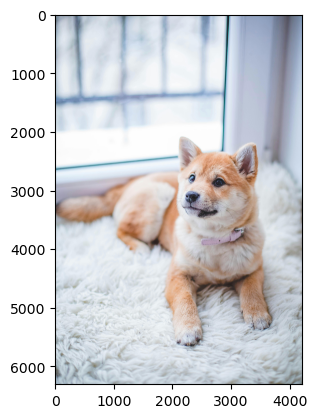

In [15]:
# Extracting the height and width of an image
h, w = img.shape[:2]
# Displaying the height and width
print("Height = {}, Width = {}".format(h, w))

#Show the image with matplotlib
plt.imshow(img[...,::-1])
plt.show()

# Image Downsizing

Image downsizing, also commonly referred to as image resizing, is a technique used to reduce the overall dimensions of an image. This process involves decreasing the number of pixels within the image.

## Impact on Quality:

It's important to understand that downsizing typically comes at the expense of image quality. As the number of pixels is reduced, the image loses detail and may appear blurry or less sharp, especially for significant reductions.

Height = 800, Width = 600


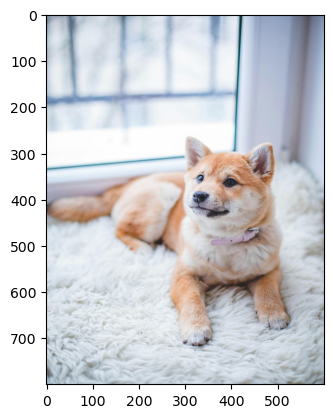

In [16]:
down_width = 600
down_height = 800
down_points = (down_width, down_height)
resized_down = cv2.resize(img, down_points, interpolation= cv2.INTER_LINEAR)

print("Height = {}, Width = {}".format(down_height, down_width))

#Show the image with matplotlib
plt.imshow(resized_down[...,::-1])
plt.show()

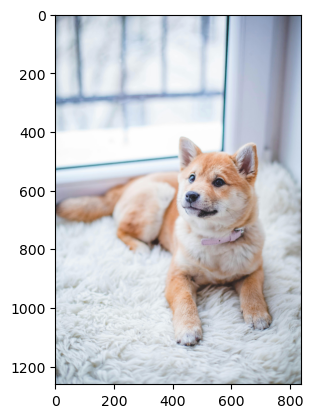

In [17]:
scale_ratio = 0.2
new_width = int(img.shape[1] * scale_ratio)
new_height = int(img.shape[0] * scale_ratio)
new_size = (new_width, new_height)
aspect_resized = cv2.resize(img, new_size, interpolation=cv2.INTER_LINEAR) #INTER_AREA

#Show the image with matplotlib
plt.imshow(aspect_resized[...,::-1])
plt.show()

# Contrast and Brightness

- Brightness is the overall amount of light in an image.
- Contrast is the difference between the lightest and darkest parts of an image.
- High contrast makes details clearer, like a high-contrast photograph.
- Low contrast makes details less clear, like a faded photograph.

The example below increase the breakness.

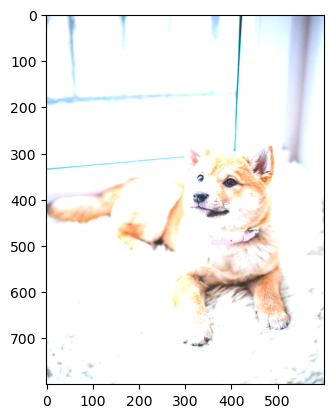

In [18]:
# Adjust contrast and brightness
alpha = 1.15  # Example contrast value
beta = 1.5    # Example brightness value
adjusted_image = cv2.convertScaleAbs(resized_down, alpha, beta)

plt.imshow(adjusted_image[...,::-1])
plt.show()

# Histogram Equalization

- Histogram equalization takes the information and tries to make the picture look more balanced. It does this by spreading out the pixels more evenly across the histogram. Imagine taking squares from the big bumps (too many dark or light squares) and filling in the dips in the middle.

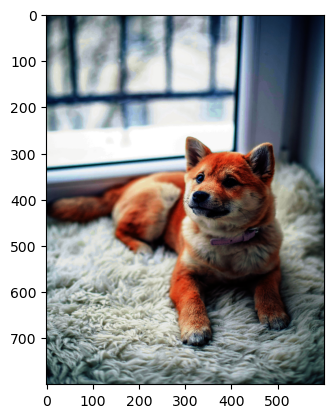

In [41]:
B, G, R = cv2.split(resized_down)
B = cv2.equalizeHist(B)
G = cv2.equalizeHist(G)
R = cv2.equalizeHist(R)
equalized_image = cv2.merge((B, G, R))

#Show the image with matplotlib
plt.imshow(equalized_image[...,::-1])
plt.show()

# Box filter (averaging)

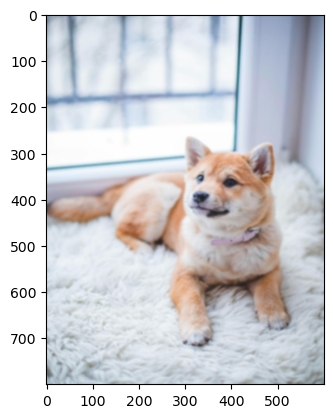

In [ ]:
matrix_size = 5

# Create a 5x5 averaging filter kernel
kernel = np.ones((matrix_size, matrix_size), np.float32) / (matrix_size*matrix_size)

# Apply the filter using cv.filter2D
box_filterred_image = cv2.filter2D(resized_down, -1, kernel)

#Show the image with matplotlib
plt.imshow(box_filterred_image[...,::-1])
plt.show()

# Gaussian Blur

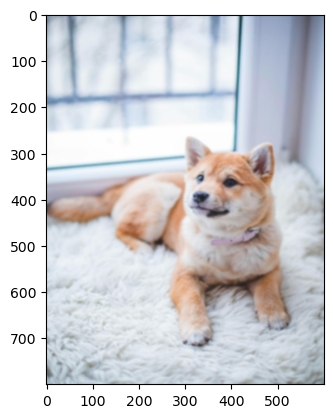

In [ ]:
blur_image = cv2.blur(resized_down, (5, 5))

# Display the modified image`
#Show the image with matplotlib
plt.imshow(blur_image[...,::-1])
plt.show()

# from Color to Grayscale

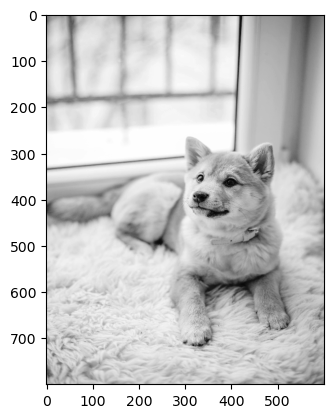

In [22]:
# TO aaa
img_gray = cv2.cvtColor(resized_down, cv2.COLOR_BGR2GRAY)

plt.imshow(img_gray[...,::], cmap='gray')
plt.show()

# Sobel filter (Edge detection)
The Sobel filter is a well-established technique in computer vision employed for edge detection within digital images. It operates by identifying areas exhibiting significant changes in pixel intensity, often corresponding to the boundaries between objects in the image.

## Conceptual Understanding:

Imagine a digital image as a collection of tiny squares called pixels. Each pixel represents a specific color intensity value. The Sobel filter focuses on detecting abrupt transitions between these intensity values across neighboring pixels. These transitions frequently occur at the edges of objects, where a shift from a dark region to a bright region (or vice versa) takes place.

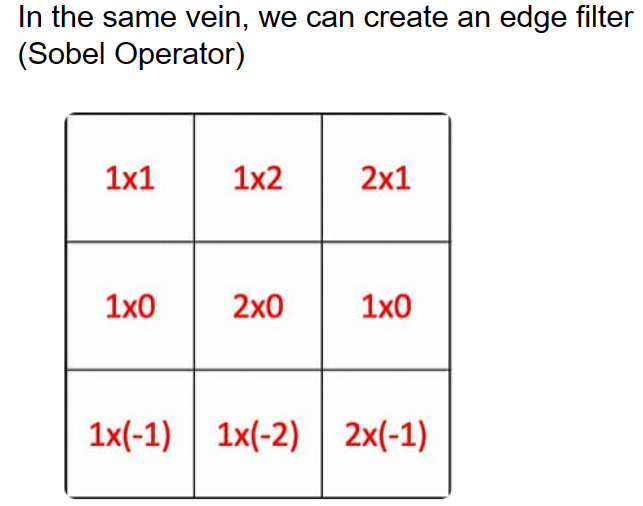

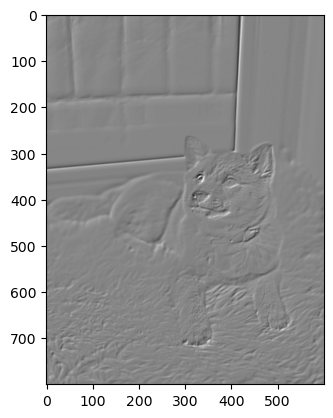

In [38]:
gX = cv2.Sobel(img_gray, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=7)
gY = cv2.Sobel(img_gray, ddepth=cv2.CV_32F, dx=0, dy=1, ksize=7)
combined = cv2.addWeighted(gX, 0.5, gY, 0.5, 0)

plt.imshow(combined[...,::], cmap='gray')
plt.show()

# Binary Thresholding

(0.0, 256.0)

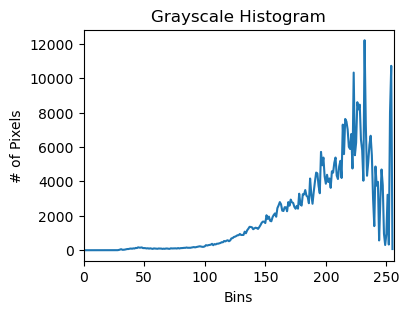

In [ ]:
# import seaborn as sns
hist = cv2.calcHist([img_gray], [0], None, [256], [0, 256])

# plot the histogram
plt.figure(figsize=(4,3))
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])

# Binary Thresholding
Binary thresholding is a fundamental technique employed in image processing for image segmentation. It aims to transform a grayscale or color image into a binary image, consisting solely of black and white pixels (which will thus would aid in creation a mask)

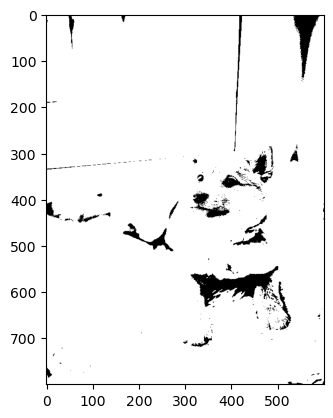

In [ ]:
ret, thresh_img = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

plt.imshow(thresh_img[...,::], cmap='gray')
plt.show()

(0.0, 256.0)

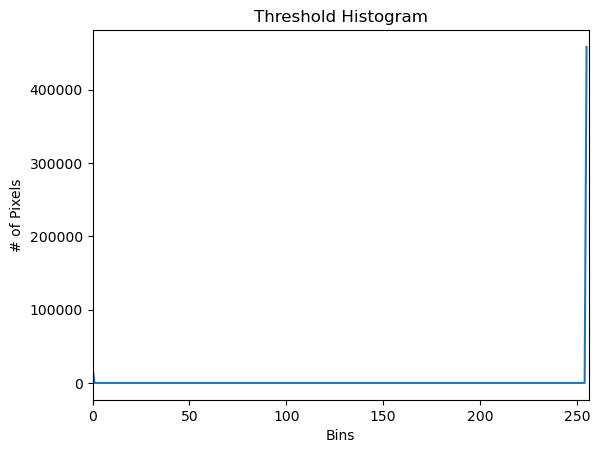

In [ ]:
# import seaborn as sns
hist = cv2.calcHist([thresh_img], [0], None, [256], [0, 256])

# plot the histogram
plt.figure()
plt.title("Threshold Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])